<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-CECD3-SASO-2/blob/master/NLP/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP 분석

0. Colab에 라이브러리 설치

In [ ]:
# !pip install pykospacing
# !pip install konlpy


# # #Google drive 
# drive.mount('/content/drive')

# #한글 폰트 
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

1. 라이브러리 로딩


In [ ]:
import re
import os
import sys
import json
import pandas as pd
import numpy as np
import tensorflow as tf

from google.colab import drive
# from pykospacing import spacing
from konlpy.tag import Kkma
from konlpy.tag import Okt
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# import soynlp
import nltk

kkma = Kkma()
okt = Okt()
plt.rc('font', family='NanumBarunGothic') 

2.전처리 과정

In [ ]:
import json

#tokenize 함수
def tokenize(doc):
  #형태소와 품사를 join
  return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

################# 테스트 #################

# 파일 위치
reviewjson_path = '/content/drive/MyDrive/Colab Notebooks/nlp/review3.json'

df = pd.read_json(reviewjson_path)

print(df)

#review list 로 변환
newData = []
for i in tqdm(range(len(df))):
  newData.append([df.text[i], df.avgStar[i]])

#tokenize 과정
new_docs = [(tokenize(row[0]), row[1]) for row in tqdm(newData)]


print(new_docs)


################# 테스트 #################




                                                 text  avgStar
0   여드름관리는 차앤박이 제일 잘하는거 같아요 염증주사도 관리 받으면서 알아서 의사분 ...       60
1   주근깨가 고민이여서 상담 다녀왔습니다. 집에서 가까운 편이구 인천 피부과 중에서 지...       72
2   피부 때문에 피부 관련 상담 및 제품 보러 갔었어요. 모공이나 흉터 그리고 홍조 개...       64
3   모공 치료가 우선적이라 모공 치료하러 다녀왔습니다.보통 피부과에서 받을 수 있는 친...       60
4   여의사 선생님이 친절하게 병명등 친절하게 설명 잘해주심. 손가락에 주사 맞게 되었을...       80
..                                                ...      ...
88  피부과 전문의 1인이 진료하는 병원으로 규모는 크지 않지만, 의사 선생님이 환자에게...       72
89  원장님 친절하시구요!! 여기서 여드름 압출이랑 스케일링 지속적으로 받고있는데 주기으...       84
90  필러 부작용 있었던곳 원장님이 고객원하는대로 최대한 해주시려는건 좋았는데 너무 많이...        8
91  남자 원장님께 눈두덩이 사마귀 시술 받았습니다 . 흉이 질 수도 있다고 했는 데 흉...       52
92  음 상담 엄청 빠르세요.. 인생 첫 피부과여서 잘 모르고 압출받으면서 다니고 그랬는...       60

[93 rows x 2 columns]



[(['여드름/Noun', '관리/Noun', '는/Josa', '차앤박/Noun', '이/Josa', '제일/Noun', '잘/VerbPrefix', '하다/Verb', '같다/Adjective', '염증/Noun', '주/Modifier', '사도/Noun', '관리/Noun', '받다/Verb', '알다/Verb', '의사/Noun', '분/Suffix', '연결하다/Adjective', '놓다/Verb', '친절하다/Adjective', '좋다/Adjective', '근데/Adverb', '점/Noun', '은/Josa', '다른/Modifier', '데/Noun', '서/Josa', '싸다/Verb', '빼세욤/Noun', '가격/Noun', '이/Josa', '비싸다/Adjective', '자다/Verb', '안/VerbPrefix', '빠지다/Verb', 'ㅠ/KoreanParticle', '손님/Noun', '이/Josa', '많다/Adjective', '대기/Noun', '가/Josa', '기다/Verb', '단점/Noun', '이에요/Josa', '!/Punctuation'], 60), (['주근깨/Noun', '가/Josa', '고민/Noun', '이/Suffix', '여서/Josa', '상담/Noun', '다녀오다/Verb', './Punctuation', '집/Noun', '에서/Josa', '가깝다/Adjective', '편이/Noun', '구/Noun', '인천/Noun', '피부/Noun', '과/Josa', '중/Noun', '에서/Josa', '지인/Noun', '추천/Noun', '받다/Verb', '곳/Noun', '이라서/Josa', '다녀오다/Verb', ',/Punctuation', '다/Adverb', '들다/Verb', '친절하다/Adjective', '만족스럽다/Adjective', './Punctuation', '시설/Noun', '도/Josa', '좋다/Adjective', '아보/Noun', '이고/Josa

토큰개수: 4866
['여드름/Noun', '관리/Noun', '는/Josa', '차앤박/Noun', '이/Josa', '제일/Noun', '잘/VerbPrefix', '하다/Verb', '같다/Adjective', '염증/Noun', '주/Modifier', '사도/Noun', '관리/Noun', '받다/Verb', '알다/Verb', '의사/Noun', '분/Suffix', '연결하다/Adjective', '놓다/Verb', '친절하다/Adjective', '좋다/Adjective', '근데/Adverb', '점/Noun', '은/Josa', '다른/Modifier', '데/Noun', '서/Josa', '싸다/Verb', '빼세욤/Noun', '가격/Noun', '이/Josa', '비싸다/Adjective', '자다/Verb', '안/VerbPrefix', '빠지다/Verb', 'ㅠ/KoreanParticle', '손님/Noun', '이/Josa', '많다/Adjective', '대기/Noun', '가/Josa', '기다/Verb', '단점/Noun', '이에요/Josa', '!/Punctuation', '주근깨/Noun', '가/Josa', '고민/Noun', '이/Suffix', '여서/Josa', '상담/Noun', '다녀오다/Verb', './Punctuation', '집/Noun', '에서/Josa', '가깝다/Adjective', '편이/Noun', '구/Noun', '인천/Noun', '피부/Noun', '과/Josa', '중/Noun', '에서/Josa', '지인/Noun', '추천/Noun', '받다/Verb', '곳/Noun', '이라서/Josa', '다녀오다/Verb', ',/Punctuation', '다/Adverb', '들다/Verb', '친절하다/Adjective', '만족스럽다/Adjective', './Punctuation', '시설/Noun', '도/Josa', '좋다/Adjective', '아보/Noun', '이고/Josa

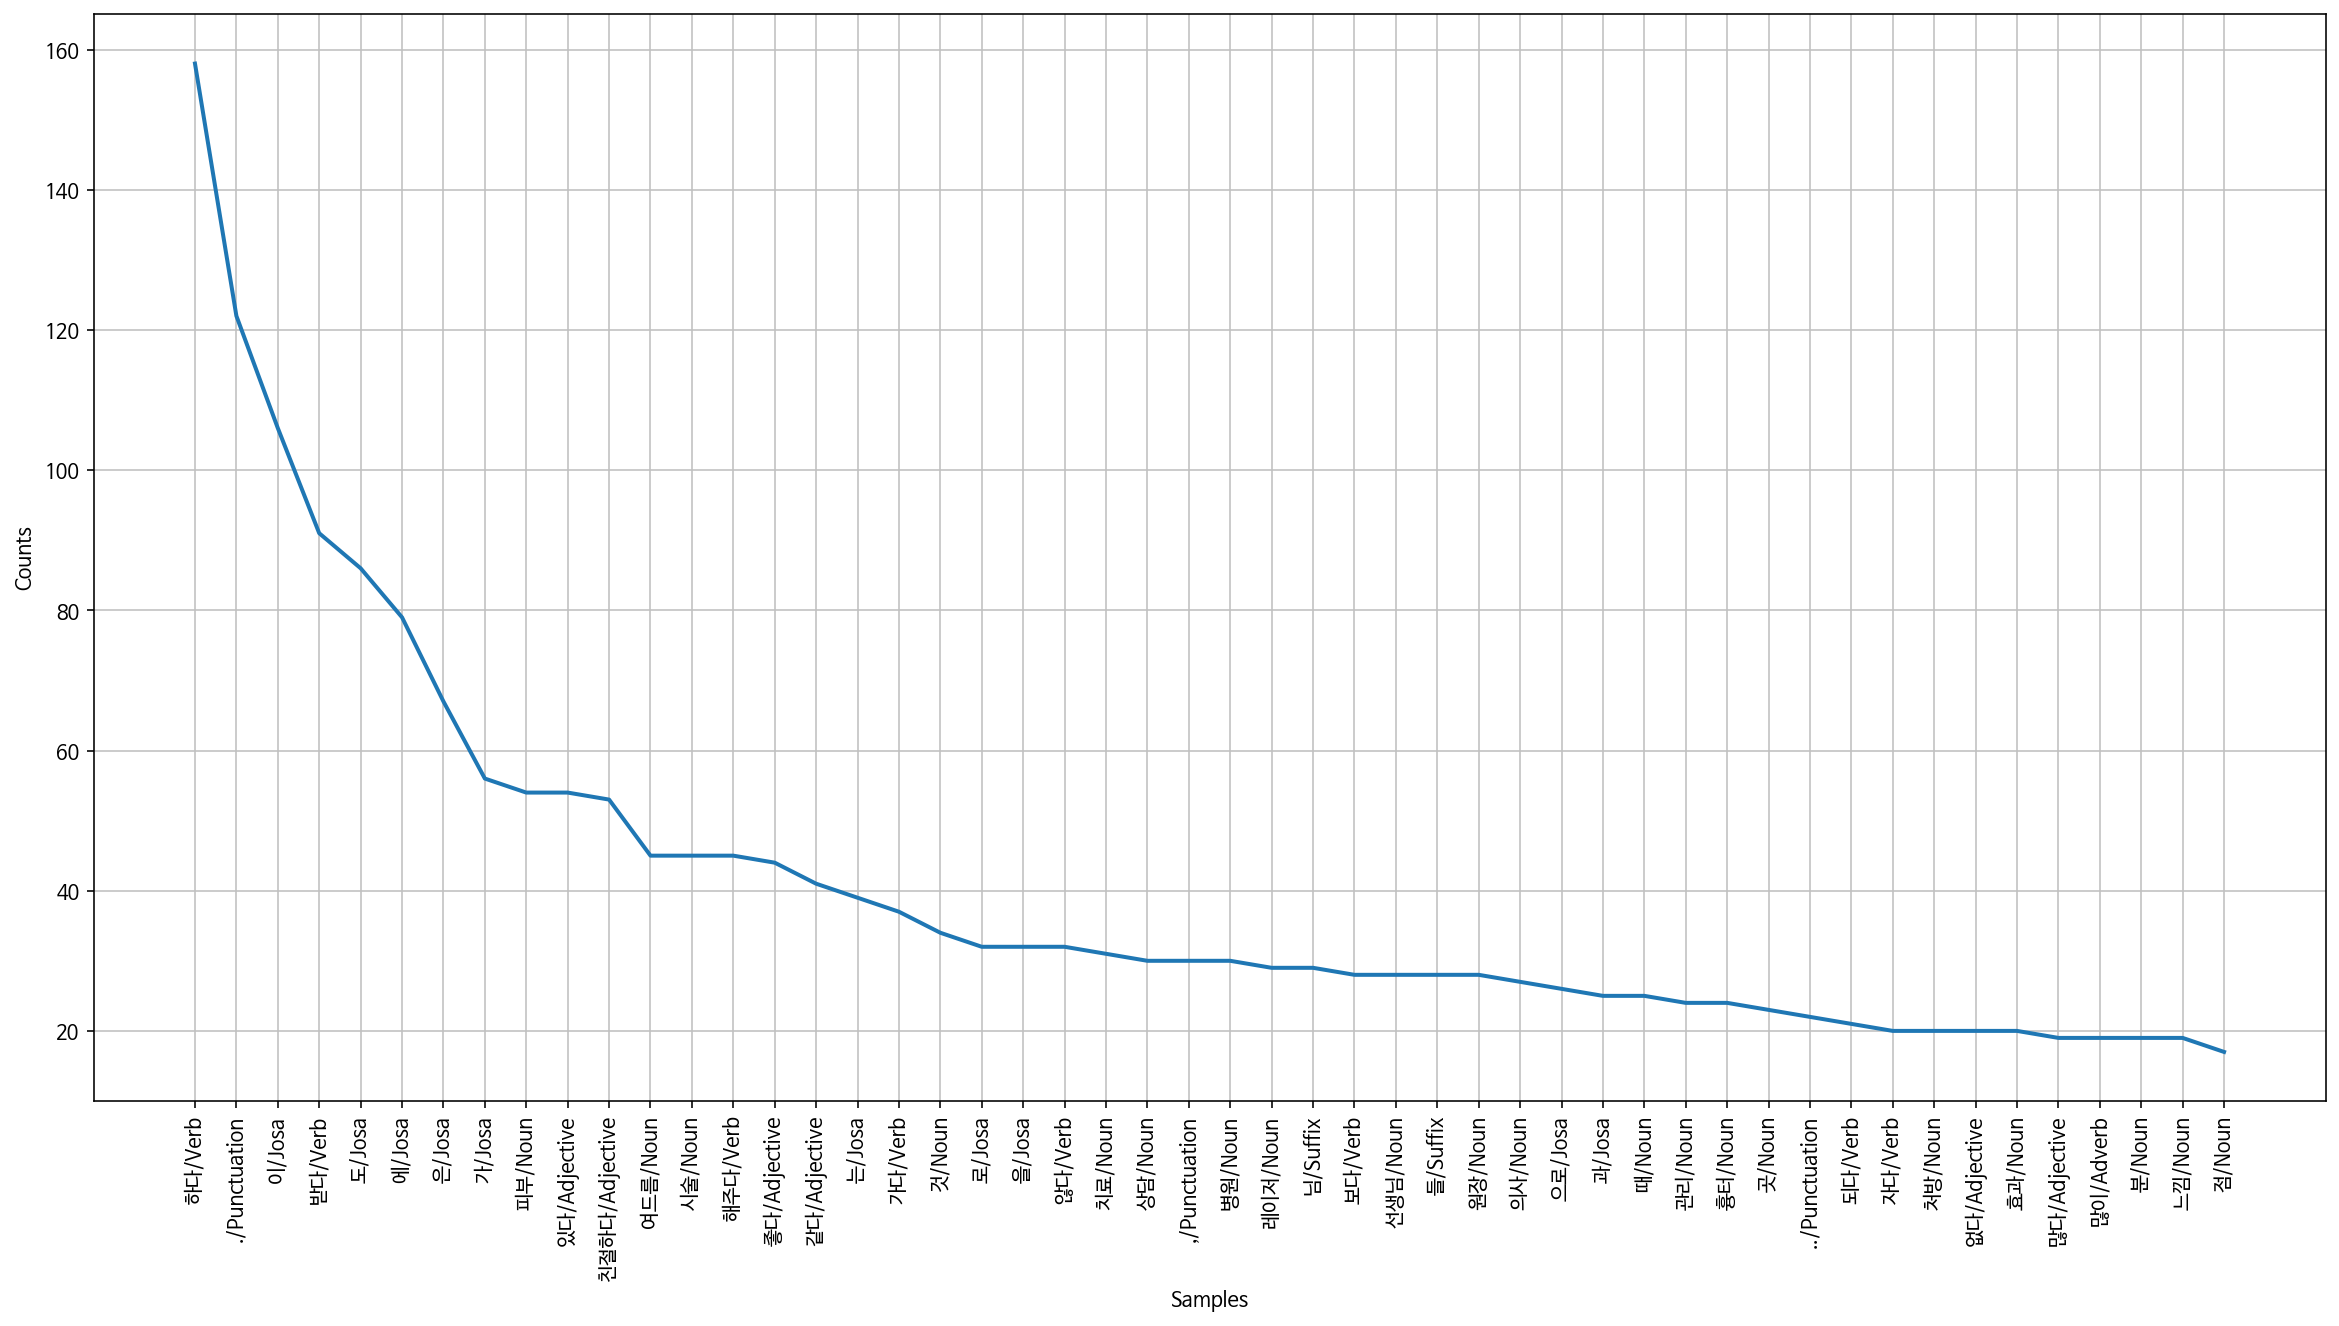

In [ ]:
#토큰 구하기
tokens = [t for d in new_docs for t in d[0]]
print("토큰개수:", len(tokens))
print(tokens)

#nltk 를 통한 전처리
text = nltk.Text(tokens, name='NMSC')

#토큰개수
print(len(text.tokens))

#중복을 제외한 토큰개수
print(len(set(text.tokens)))

#출력빈도가 높은 상위 토큰 10개
print(text.vocab().most_common(20))

#명사 출력
noun = []
noun = [t for d in new_docs for t in d[0] if 'Noun' in t]

test = nltk.Text(noun, name='NMSC')
print(len(set(test.tokens)))
print(test.vocab().most_common(20))


print(noun)




#상위 토큰 10개 matpolib 으로 출력
plt.figure(figsize=(20,10))
text.plot(50)


In [ ]:

#모델을 만들기 위해 벡터화
#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW(Bag of Words) 인코딩한 벡터를 만드는 역할
FREQUENCY_COUNT = 100;
selected_words = [f[0] for f in text.vocab().most_common(FREQUENCY_COUNT)]

#단어리스트 문서에서 상위 100개들중 포함되는 단어들이 개수
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]


x_new = [term_frequency(d) for d,_ in new_docs]
#라벨(1 or 0)
y_new = [c for _,c in new_docs]

#float 형으로 형변환
x_new = np.asarray(x_new).astype('float32')
y_new = np.asarray(y_new).astype('float32')

#레이어 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#학습 프로세스 설정
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.binary_accuracy]
    )

#학습 데이터로 학습
model.fit(x_new, y_new, epochs=10, batch_size=512)


results = model.evaluate(x_new, y_new)

results

def predict_review(review):
    token = tokenize(review)
    tfq = term_frequency(token)
    data = np.expand_dims(np.asarray(tfq).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        print(f"{review} ==> 긍정 ({round(score*100)}%)")
    else:
        print(f"{review} ==> 부정 ({round((1-score)*100)}%)")


Epoch 1/10
1/1 [==============================] - 0s 490ms/step - loss: -22.9026 - binary_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: -58.2538 - binary_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: -87.1258 - binary_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: -115.1418 - binary_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: -144.1000 - binary_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: -174.6143 - binary_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: -207.0966 - binary_accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: -241.7003 - binary_accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: -278.6167 - binary_accuracy: 0.0000e+00
Epoch 10/1

In [ ]:

predict_review("유튜브에서 보던 느낌 그대로 상담 하세요 김태규 원장님. 그러나 자신만의 확고한 철학이 잇으셔서 그런지 타 병원 상담때와 대치되는 말을 몇개 하심 제 피부탄력이나 턱모양등... 결정적으로 후기사진이 하나 같이 몽달귀신 st 턱이어서 별로엿음")
predict_review('안면윤곽 상담받았어요 생각보다 병원에 사람이 많아요 김태규 원장님과 상담받았고 수술비용은 다른 병원에 바해서 조금 싼거같습니다. 원장님은 전문성 있어보였고 사람이 많아서 대기시간이 갈고 오래 기다린거 외엔 괜찮았습니다.')
predict_review('잘모르겠음 여러곳상담다녀봤는데 특별히다른거없는 그냥 완전평범한 성형외과임 근데 상담을 짧게함 대체 몇백들여서 얼굴만드는수술하는데 30분도안되는 상담받고서 어떻게하겠다는거임? 상담만받고 거른거같음 . . .')

유튜브에서 보던 느낌 그대로 상담 하세요 김태규 원장님. 그러나 자신만의 확고한 철학이 잇으셔서 그런지 타 병원 상담때와 대치되는 말을 몇개 하심 제 피부탄력이나 턱모양등... 결정적으로 후기사진이 하나 같이 몽달귀신 st 턱이어서 별로엿음 ==> 긍정 (98%)
안면윤곽 상담받았어요 생각보다 병원에 사람이 많아요 김태규 원장님과 상담받았고 수술비용은 다른 병원에 바해서 조금 싼거같습니다. 원장님은 전문성 있어보였고 사람이 많아서 대기시간이 갈고 오래 기다린거 외엔 괜찮았습니다. ==> 긍정 (100%)
잘모르겠음 여러곳상담다녀봤는데 특별히다른거없는 그냥 완전평범한 성형외과임 근데 상담을 짧게함 대체 몇백들여서 얼굴만드는수술하는데 30분도안되는 상담받고서 어떻게하겠다는거임? 상담만받고 거른거같음 . . . ==> 긍정 (99%)
